In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 : 컴퓨터에게 데이터를 학습 (지도학습)
# 지도학습 : 컴퓨터에게 문제집 / 정답지를 제공
fish = pd.read_csv("fish.csv") #생선의 길이와 무게, 종류(도미(bream)와 빙어(smelt))
fish 

,length,weight,target
0,25.4,242.0,bream
1,26.3,290.0,bream
2,26.5,340.0,bream
3,29.0,363.0,bream
4,29.0,430.0,bream
5,29.7,450.0,bream
6,29.7,500.0,bream
7,30.0,390.0,bream
8,30.0,450.0,bream
9,30.7,500.0,bream


In [2]:
fish.info() # 도미 35마리, 빙어 14마리 (총 49마리)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   target  49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


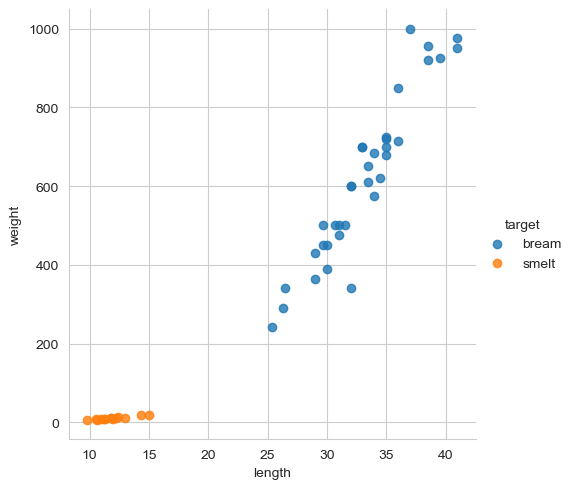

In [9]:
sns.set_style("whitegrid")
sns.lmplot(data=fish, x="length", y="weight", 
           fit_reg=False, hue='target')

In [21]:
# KNN : K-최근접 이웃 모델
# 길이 40cm, 무게 400g => ?

X = fish[['length','weight']] # 문제지
Y = fish['target'] # 정답지

import numpy as np
np.array([1,3,2,5,4]) + 10 # np를 이용하면 행렬상태로 만들어 각 수를 더하거나 곱하거나 등 처리를 할 수 있음

X = np.array(fish[['length','weight']])
Y = np.array(fish['target'])


from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() # KNN 모델 생성
knn.fit(X, Y) # 학습해라

KNeighborsClassifier()

In [25]:
test_fish_sample = [40, 400] # 임의로 생선 데이터 예시를 만들어서
knn.predict([test_fish_sample]) # 예측해라 [test_fish_sample]을...

array(['bream'], dtype=object)

In [29]:
knn.predict(X)== Y # 예측값(predict(X))이 어떻게 Y와 동일하게 나오는지....

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [30]:
knn.score(X,Y) # X값으로 예측한 값과 Y를 비교해서 정확도로 비교해줘 (1.0 == 100%임)

1.0

In [31]:
# 전체 40개 데이터 정도만 학습 // 9개 데이터로는 시험
# 데이터 분할 (최대한 많이 훈련데이터에 할당)
from sklearn.model_selection import train_test_split # sklearn : 75:25 비율로 나누길 권장 (Google : 8:2 비율 권장)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2) # 변수(훈련/테스트 x, y) 별로 분할

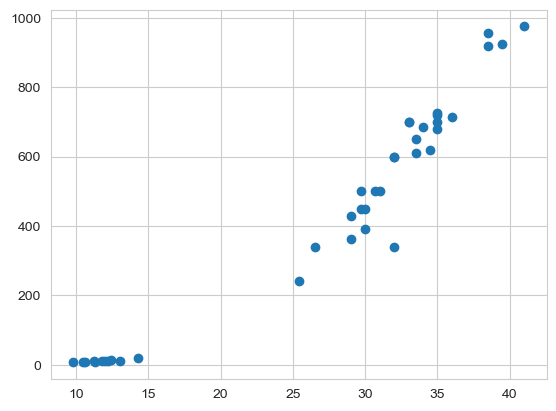

In [37]:
plt.scatter(train_x[:, 0], train_x[:,1]) # 훈련데이터가 잘 섞여서 그림으로 나오는지

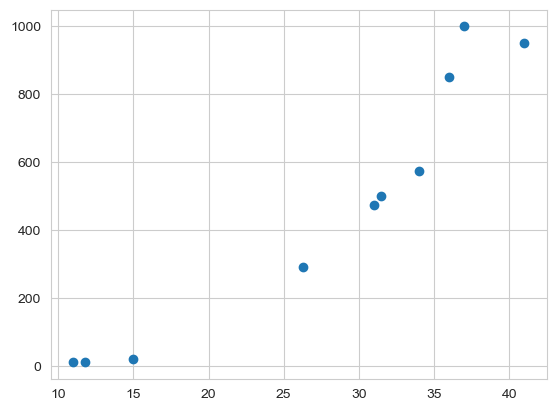

In [38]:
plt.scatter(test_x[:, 0], test_x[:, 1]) #테스트용 데이터가 잘 섞여서 그림으로 나오는 지

In [36]:
knn2 = KNeighborsClassifier() # 테스트를 위해 새 KNN 모델을 정의
knn2.fit(train_x, train_y) # 학습용 데이터를 학습
knn2.score(test_x, test_y) # 테스트용을 통해 스코어링(모르는 데이터도 다 맞췄음)

1.0

In [39]:
test_fish_sample = [25, 150]
knn2.predict([test_fish_sample]) ## ?? 25cm인 빙어는 실제로 없는디?

array(['smelt'], dtype=object)

TypeError: only length-1 arrays can be converted to Python scalars

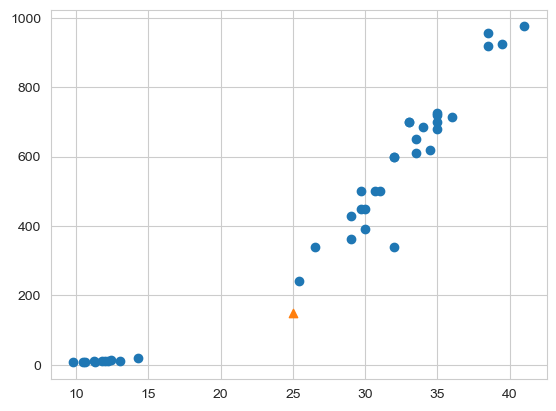

In [48]:
plt.scatter(train_x[:, 0], train_x[:,1])
plt.scatter(25, 150, marker="^")

# distance, index (가까운 거리와 인덱스를 표현)
d, index = knn.kneighbors([[25, 150]])
d, index

plt.scatter(train_x[idx, 0], train_x[idx, 1], marker='D')

In [55]:
# 길이 < 무게 -----> 컴퓨터가 길이 == 무게로 중요도를 평준화 필요
# (길이 - 길이평균)/길이표준편차 (= 평균 0, 표준편차 1)
# (무게 - 무게평균)/무게표준편차 (= 평균 0, 표준편차 1)

mean = np.mean(train_x, axis=0) #axis=0(열방향), 1(행방향)
std = np.std(train_x, axis=0) #axis=0(열방향), 1(행방향)

train_scaled=(train_x-mean)/std # 표준정규분포화 (= Normalize)
test_scaled=(test_x-mean)/std # 테스트용 데이터도 표준정규분포화

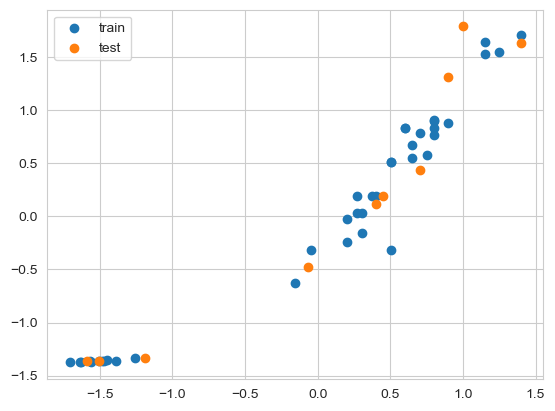

In [56]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.legend(['train', 'test'])
plt.show()

In [59]:
# 정리(머신러닝 프로세스)
# 데이터 불러오기 -> 데이터 분할 -> 데이터 표준화

knn3 = KNeighborsClassifier() 
knn3.fit(train_scaled, train_y) # 표준화한 데이터와 학습용 Y데이터(물고기명)와 학습 -- (중앙값/표준편차)
knn3.score(test_scaled, test_y) # 점수는?!

1.0

In [60]:
###########################################################
###########################################################
###########################################################

array(['bream'], dtype=object)

In [70]:
# fish2 데이터 불러오기 -> 분할 -> 표준화 -> 모델생성 -> 학습 -> 평가 -> 임의의 값 예측
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fish2 = pd.read_csv("fish2.csv")
fish2 # 7종류, 5특성
      # Weight, Length, Diagonal, Height, Width

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

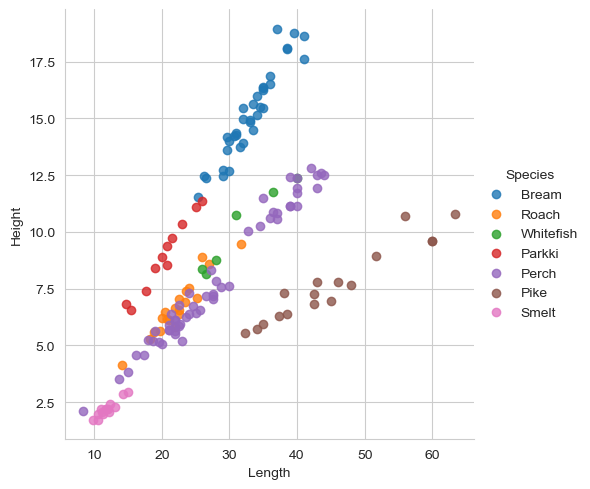

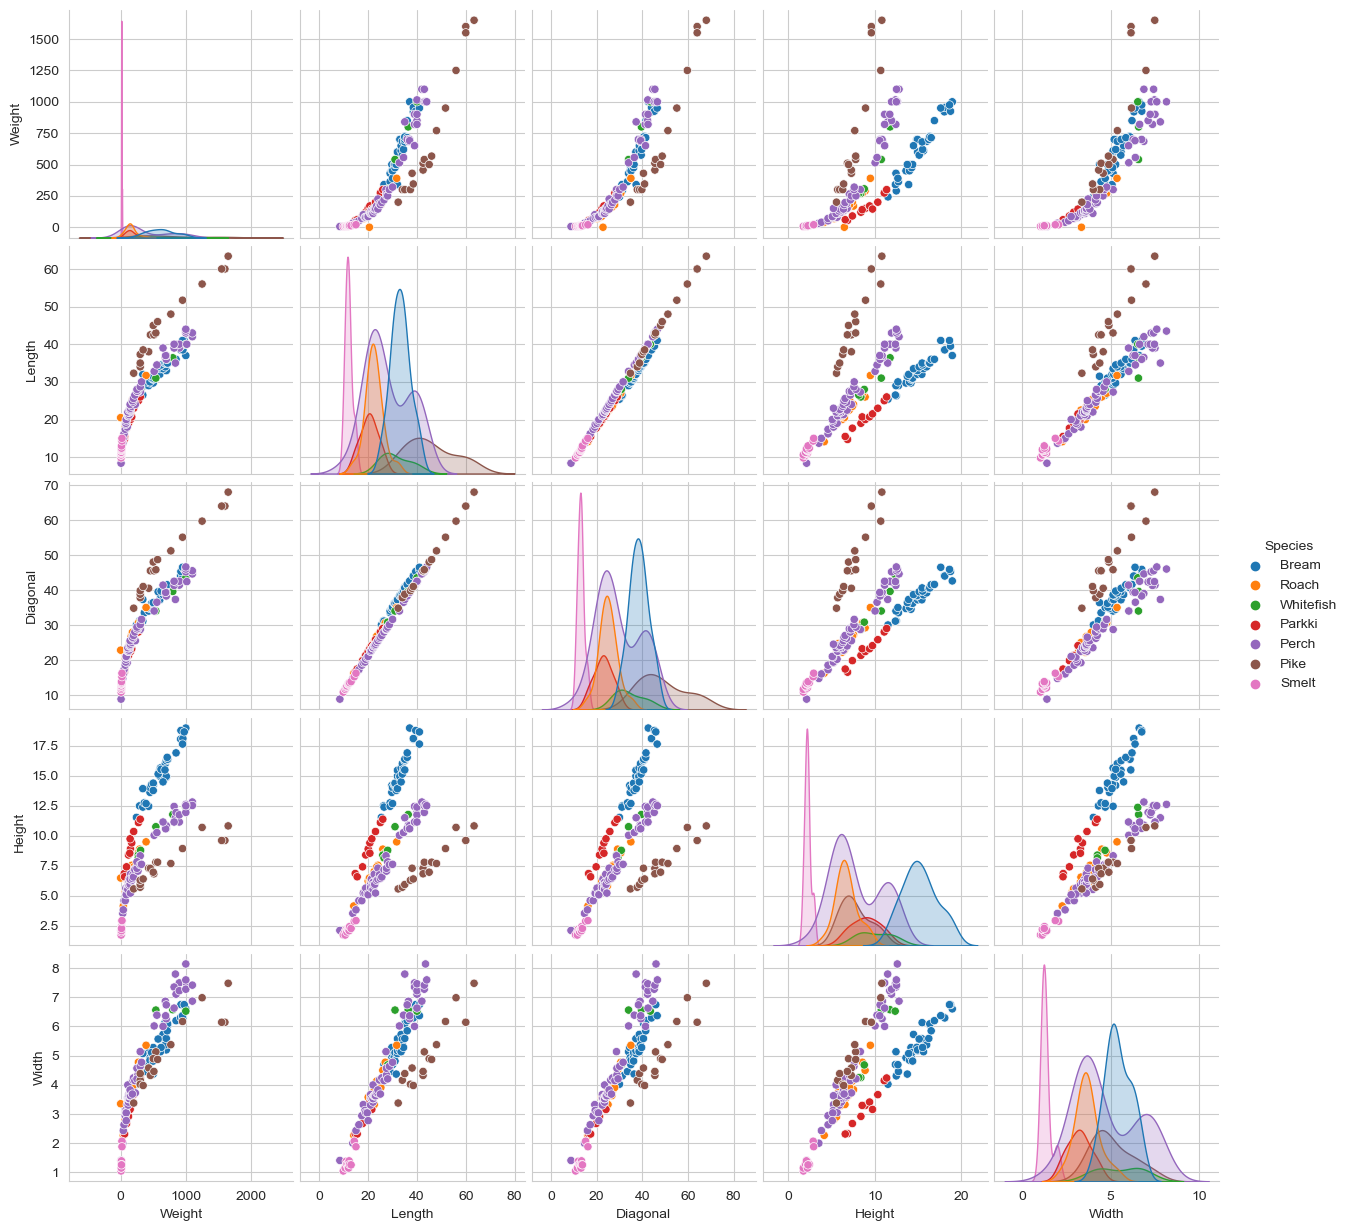

In [95]:
# 데이터 분류하여 sns 표현 (제일 잘 분류할 수 있는 2차원 데이터 값 찾아야함)
sns.set_style("whitegrid")
sns.lmplot(data=fish2, x="Length", y="Height", 
           fit_reg=False, hue='Species') # 주영생각 : 그나마 Length 랑 Height로 X/Y 분류하였을 때, 분류가 잘 됐음
sns.pairplot(fish2, hue="Species") #산점도 행렬 : 비교할 수 있는 모든 변수별 비교

In [91]:
# 2차원 데이터를 정의
import numpy as np
X = np.array(fish2[["Length","Height"]]) # 2차원 데이터로 Length와 Height를 정의
Y = np.array(fish2["Species"]) # 대상은 생선종으로 정의

# 학습용/테스트용 데이터를 분리
from sklearn.model_selection import train_test_split # sklearn : 75:25 비율로 나누길 권장 (Google : 8:2 비율 권장)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2) # 변수(훈련/테스트 x, y) 별로 분할

# 평균/표준편차를 계산
mean = np.mean(train_x, axis=0) #axis=0(열방향), 1(행방향)
std = np.std(train_x, axis=0) #axis=0(열방향), 1(행방향)

# Normalize화
train_scaled=(train_x-mean)/std # 표준정규분포화 (= Normalize)
test_scaled=(test_x-mean)/std # 테스트용 데이터도 표준정규분포화

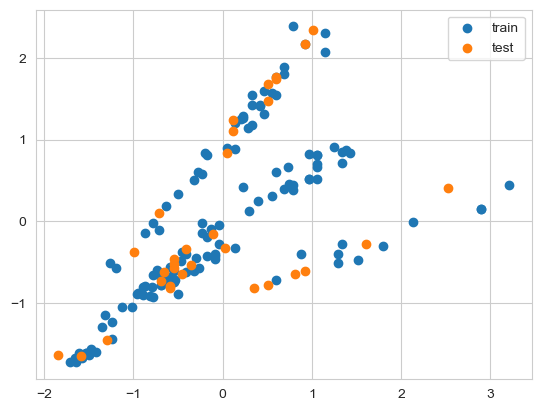

In [92]:
# Normalize한 학습데이터 및 테스트데이터가 잘 선별되었는 지 표현
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.legend(['train', 'test'])

In [93]:
# KNN 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier 
knn_fish2 = KNeighborsClassifier() # KNN 모델 생성
knn_fish2.fit(train_scaled, train_y) # 표준화한 데이터와 학습용 Y데이터(물고기명)와 학습 -- (중앙값/표준편차)
knn_fish2.score(test_scaled, test_y) # 점수는?!

0.8125

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

array(['Bream'], dtype=object)

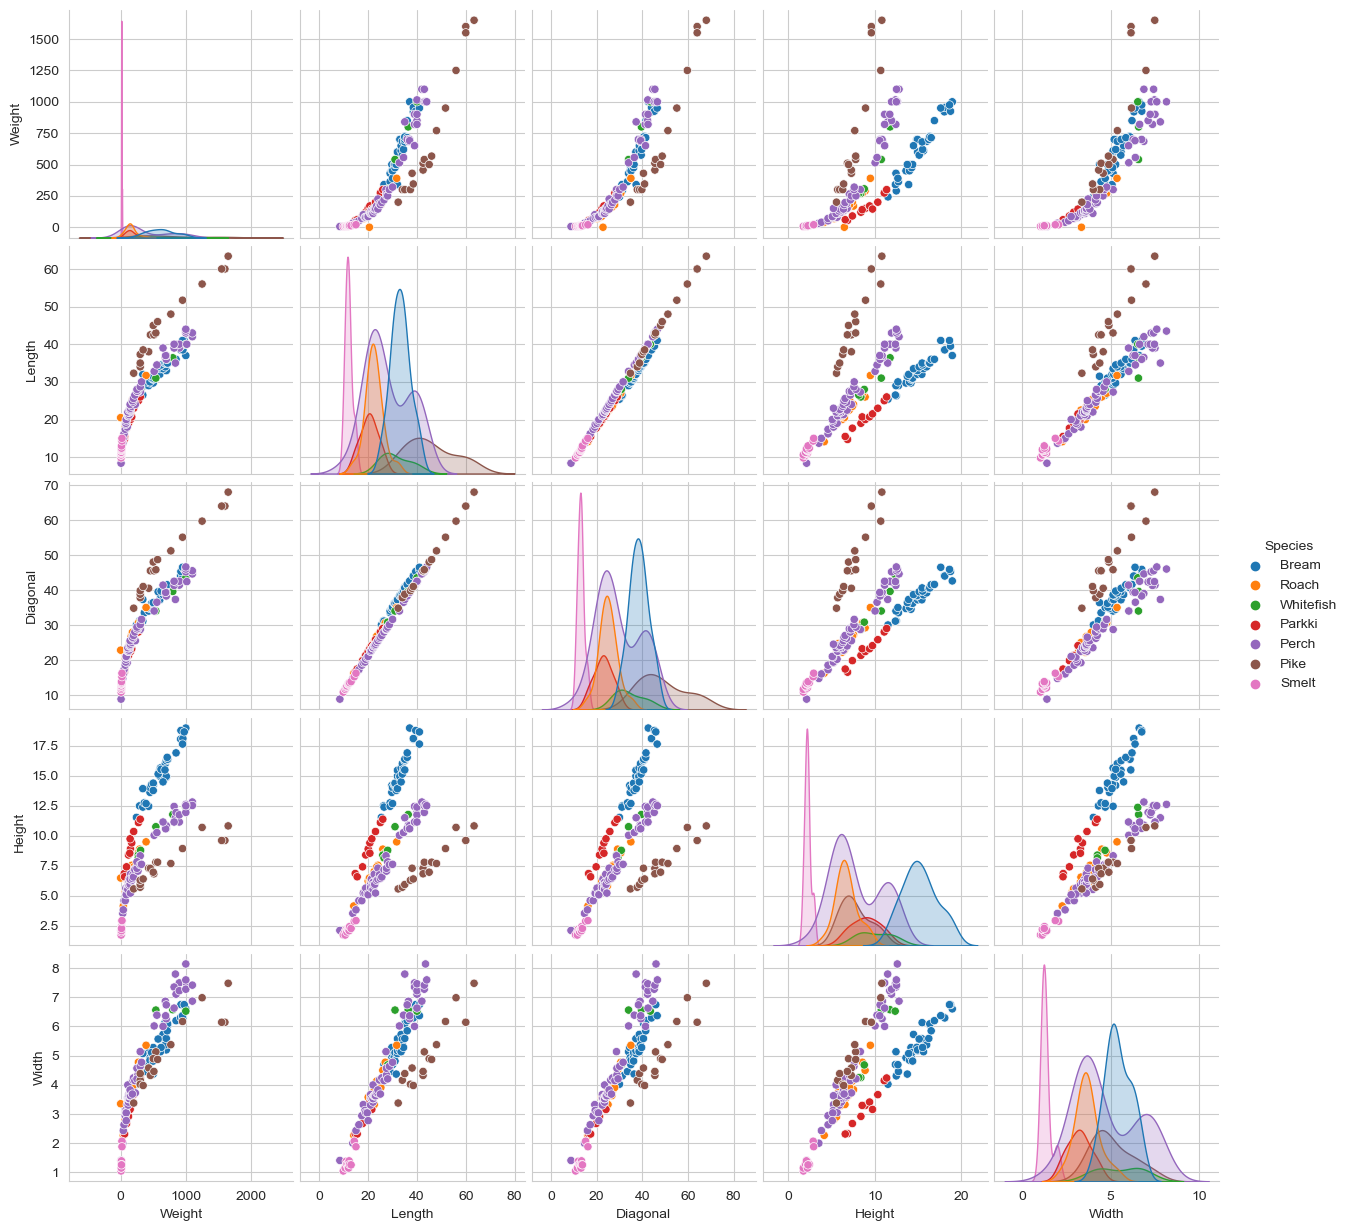

In [100]:
############################################# 강사님 풀이

# 데이터 분류하여 sns 표현 (제일 잘 분류할 수 있는 2차원 데이터 값 찾아야함)
# Weight, Length, Diagonal, Height, Width
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fish2 = pd.read_csv("fish2.csv")
sns.set_style("whitegrid")
sns.pairplot(fish2, hue="Species")

# X, Y 데이터 분리
import numpy as np
X = fish2.iloc[:, 1:].to_numpy()
Y = fish2['Species'].to_numpy()

# 학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split # sklearn : 75:25 비율로 나누길 권장 (Google : 8:2 비율 권장)
train_x, test_x, train_y, test_y = train_test_split(X, Y) # 변수(훈련/테스트 x, y) 별로 분할 / 자동으로 75:25로 분할(test_size 미정의)

# 평균/표준편차를 계산 및 Normalize
from sklearn.preprocessing import StandardScaler # 데이터 표준화 라이브러리
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x) # mean, std를 자동으로 계산해 표준화함 // fit_transform(학습값의 표준화를 해라)
test_scaled = ss.transform(test_x) # transform(일반 데이터의 표준화를 해라) == 위에서 구했던 평균과 표준편차로 변환해라.

# KNN 학습 및 모델링
knn = KNeighborsClassifier(n_neighbors=8) #n_neighbors = 적절한 이웃숫자 갯수를 지정
knn.fit(train_scaled, train_y) # 가장 가까운 데이터 5개(기본값)
knn.score(test_scaled, test_y) # 모델 평가

# 샘플 데이터를 노멀라이즈 하고 학습
a = [250,26,32,12,5]
a = ss.transform([a])
knn.predict(a)

In [97]:
box = []
for n in range(1,31):
    knn.n_neighbors = n # 이웃숫자를 1~30개 까지 여러번 해보면서 시뮬레이션
    score = knn.score(test_scaled, test_y)
    box.append(score)
box

[0.8,
 0.85,
 0.85,
 0.825,
 0.85,
 0.85,
 0.775,
 0.875,
 0.85,
 0.85,
 0.8,
 0.8,
 0.75,
 0.775,
 0.775,
 0.775,
 0.725,
 0.725,
 0.725,
 0.775,
 0.775,
 0.75,
 0.725,
 0.75,
 0.775,
 0.725,
 0.725,
 0.725,
 0.725,
 0.725]

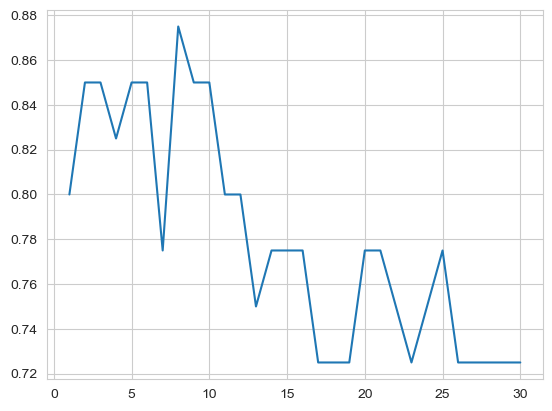

In [98]:
plt.plot(range(1,31), box)

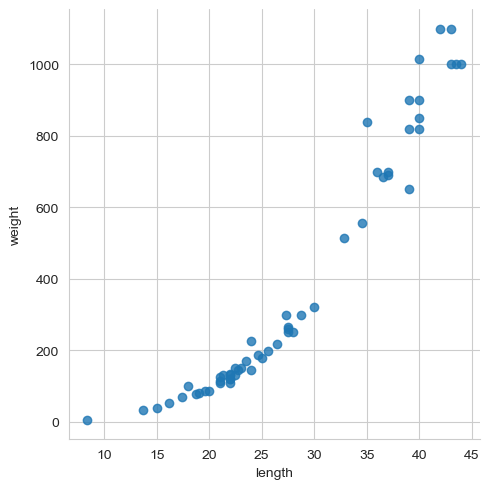

In [106]:
# K 최근접 이웃 회귀모델 (연속적인 것, 키, 몸무게, 수익, 시계열 등)
perch = pd.read_csv("perch.csv") #농어 데이터
perch #length, weight만 있음 (길이를 가지고 무게를 예측)

sns.lmplot(perch, x="length", y="weight", fit_reg=False)

In [133]:
X = perch['length'].to_numpy() # 문제지: 2차원이어야 함(지금은 1차원임)
X = X.reshape(56,1)            # 1 -> 2차원으로 변형 (56x1)
Y = perch['weight'].to_numpy() # 정답지 : 1차원이어야 함(O)

X.shape, Y.shape

train_x, test_x, train_y, test_y = train_test_split(X, Y)

from sklearn.neighbors import KNeighborsRegressor #K 이웃 회귀
knr = KNeighborsRegressor()
knr.fit(train_x, train_y)

KNeighborsRegressor()

In [134]:
# 테스트값으로 예측 - 실제값 == 오차 값을 절대값으로 계산(abs) 및 평균(np.mean)
np.mean(abs(knr.predict(test_x) - test_y))
# --> 내 모델이 평균 37g 정도는 틀리는구나...

37.028571428571425

In [135]:
knr.score(test_x, test_y) #r^2 : 실제값과 예측오차가 3.6% 정도 나는구나.

0.9815933270130487

In [183]:
#####################################
# perch2 모델을 활용해서 회귀모델 만들기.
#####################################

perch2 = pd.read_csv("perch2.csv")
perch2

X = perch2.iloc[:, :-1].to_numpy()
Y = perch2['weight'].to_numpy()

from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(X, Y)

# 평균/표준편차를 계산 및 Normalize
from sklearn.preprocessing import StandardScaler # 데이터 표준화 라이브러리
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x) # mean, std를 자동으로 계산해 표준화함 // fit_transform(학습값의 표준화를 해라)
test_scaled = ss.transform(test_x)

from sklearn.neighbors import KNeighborsRegressor #K 이웃 회귀
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(train_scaled, train_y)

KNeighborsRegressor(n_neighbors=2)

In [184]:
np.mean(abs(knr.predict(test_scaled) - test_y))

20.017857142857142

In [185]:
knr.score(test_scaled, test_y)

0.993334996497283

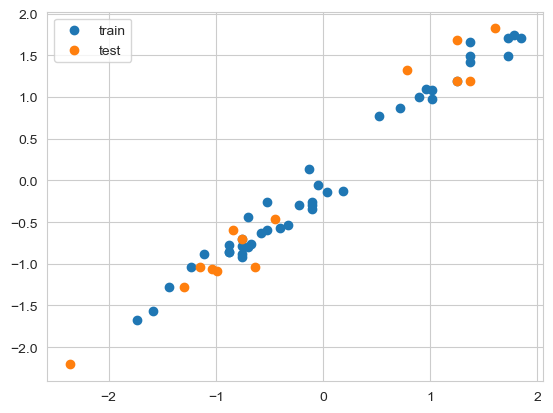

In [180]:
# Normalize한 학습데이터 및 테스트데이터가 잘 선별되었는 지 표현
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(test_scaled[:, 0], test_scaled[:, 1])
plt.legend(['train', 'test'])

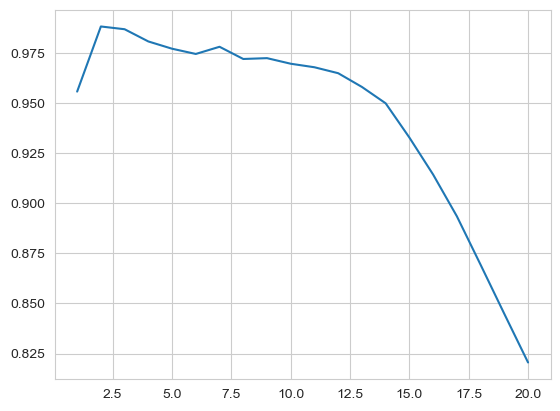

In [182]:
# KNeighborsRegressor 내 n_neighbors의 최적의 수를 

box = []
for n in range(1, 21):
    knr.n_neighbors = n
    score = knr.score(test_scaled, test_y)
    box.append(score)
box
plt.plot(range(1,21), box)
plt.show()

In [202]:
#############################
# 결정트리 모델(Decision Tree) -> XGBoost, RandomForest 등이 파생
# 성능이 좋음.
# 쉽다. (표준화,분할 불필요)
# 데이터에 설명력을 가질 수 있음.
# 스무고개 형식으로 질문하는 방식.
#############################

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 결정트리 분류모델

# iris : 3종류의 꽃 데이터(세토사, 버지컬러, 버지니카 꽃)
iris = load_iris()
print(iris.feature_names, iris.target_names)

X = iris.data
Y = iris.target

train_x, test_x, train_y, test_y = train_test_split(X, Y)
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt.score(test_x, test_y)

dt.predict([[5,4,2,0.5]]) # array([0])이라 나올것임 == 세토사 라는 꽃임.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


array([0])

[Text(0.3333333333333333, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [38, 39, 35]'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'petal width (cm) <= 1.55\ngini = 0.499\nsamples = 74\nvalue = [0, 39, 35]'),
 Text(0.2222222222222222, 0.6428571428571429, 'petal length (cm) <= 4.95\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.6428571428571429, 'petal length (cm) <= 5.05\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(0.5555555555555556, 0.5, 'sepal width (cm) <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.6666666666666666, 0.35714285714285715, 's

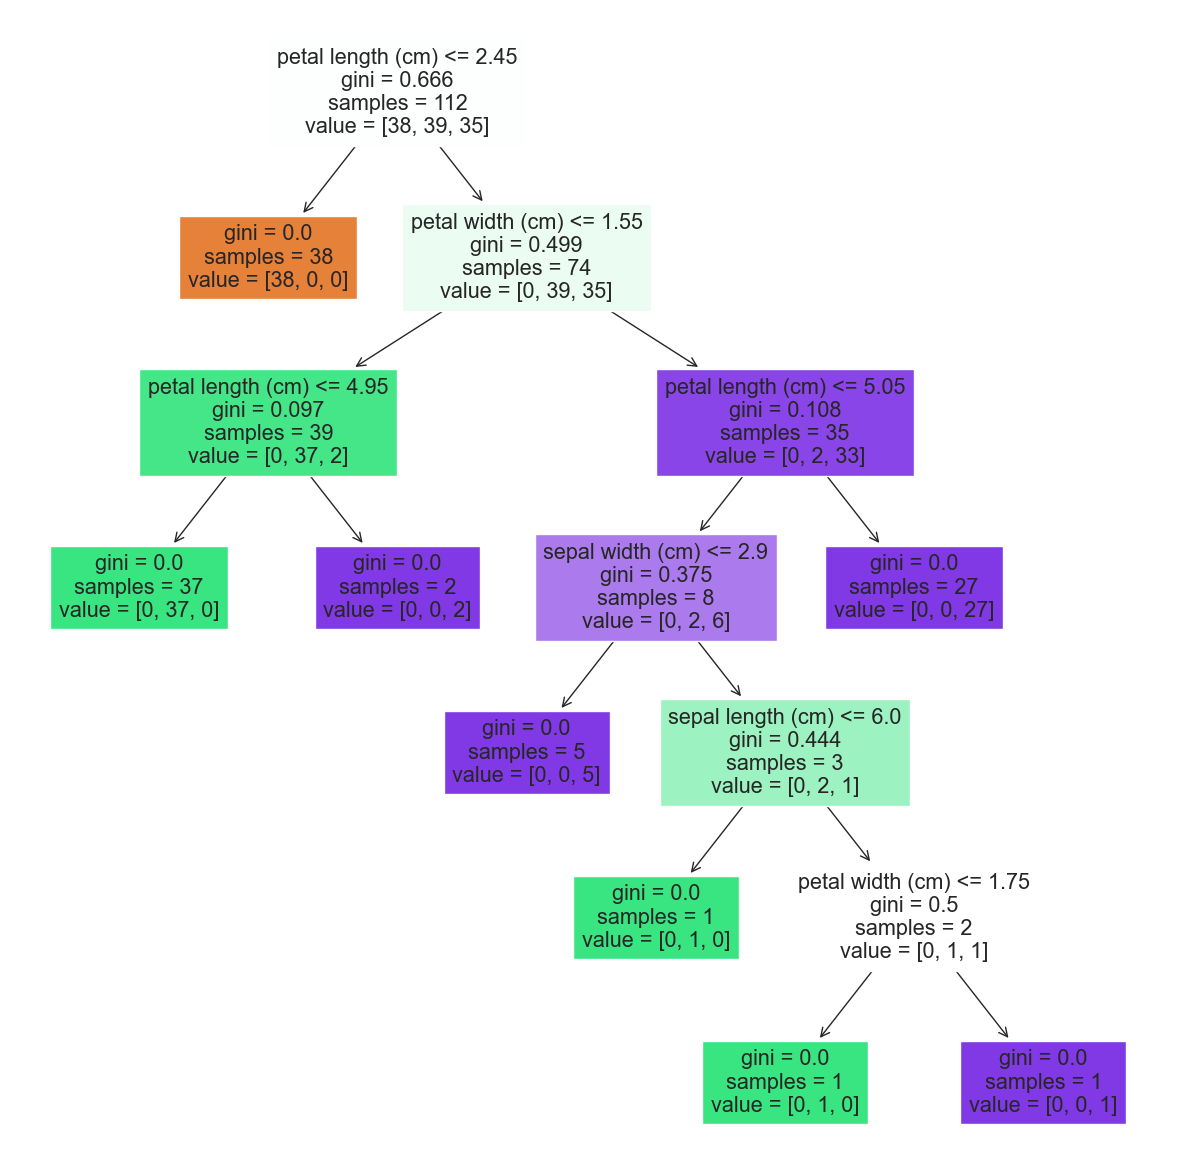

In [206]:
# 결정트리가 어떻게 학습했는 지 시각화 == 설명력
from sklearn.tree import plot_tree 
plt.figure(figsize=[15,15])
plot_tree(dt, feature_names=iris.feature_names, filled=True)

In [218]:
#############################
# 랜덤포레스트 모델 (랜덤포레스트(결정트리100개) >> DecisionTree)
# 분할 불필요 (알아서 분류 및 평가데이터를 선별하고 수시로 결정트리모델을 반복평가함)
#############################

# fish2를 가지고 랜덤포레스트 모델 써보기 (랜덤포레스트(결정트리100개) >> DecisionTree)
fish2 = pd.read_csv("fish2.csv")

# X, Y 데이터 분리
import numpy as np
X = fish2.iloc[:, 1:].to_numpy()
Y = fish2['Species'].to_numpy()

# 앙상블 내 랜덤포레스트 분류모델
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(oob_score=True) # oob_score : 학습데이터가 아닌 남은 데이터를 가지고 평가
rf.fit(X,Y)
rf.oob_score_

0.7987421383647799

In [232]:
##################
# pima_indians : class (1: 당뇨, 0: 당뇨아님)
##################

pima_indians = pd.read_csv("pima_indians.csv")
pima_indians

# 문제지(X), 답안지(Y)를 정의
X = pima_indians.iloc[:, :-1].to_numpy()
Y = pima_indians['Class'].to_numpy()

# 랜덤포레스트를 통한 X,Y 넣고 학습 / 스코어링
rf = RandomForestClassifier(oob_score=True) # oob_score : 학습데이터가 아닌 남은 데이터를 가지고 평가 / n_estimators: 평가할 결정트리모델 갯수를 지정
rf.fit(X,Y)
rf.oob_score_

0.7708333333333334

In [234]:
test_pima = [3, 145, 75, 35, 5, 35, 1, 45]
rf.predict([test_pima]) # 1이기 때문에 "당뇨" 판정

array([1])

             Open   High    Low  Close    Volume    Change
Date                                                      
1999-12-21   5000   5360   4900   5040    967402  0.014085
1999-12-22   5140   5350   5060   5280    826858  0.047619
1999-12-23   5280   5700   5240   5580   1057262  0.056818
1999-12-24   5700   5720   5360   5460    708446 -0.021505
1999-12-27   5460   5490   5140   5220    934057 -0.043956
...           ...    ...    ...    ...       ...       ...
2024-04-05  84500  85000  83800  84500  18883752 -0.009379
2024-04-08  85200  86000  84500  84500  18953232  0.000000
2024-04-09  84500  84900  83100  83600  23725956 -0.010651
2024-04-11  83200  84700  82500  84100  25538009  0.005981
2024-04-12  84700  84900  83200  83700  16963684 -0.004756

[5999 rows x 6 columns]
rf.oob_score_ : 0.9991854584612272
rf.predict([a]) : [83451.]


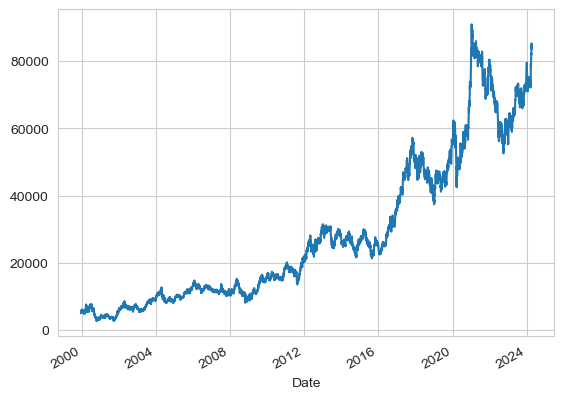

In [287]:
##################
# 삼성 주가예측 (시계열 분석)
# 2024년 4월 15일 주가예측
#################

samsung = pd.read_excel("samsung.xlsx").dropna()
samsung = samsung.set_index("Date") # Date 행을 인덱스로 설정해라
print(samsung)

samsung['Close'].plot()

X, Y = [], []

for i in range(len(samsung)-1):
    a = samsung.iloc[i].to_numpy()
    b = samsung.iloc[i+1]['Close']
    
    X.append(a) # 문제지 (당일 데이터)
    Y.append(b) # 답안지 (다음날 종가)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(oob_score=True)
rf.fit(X,Y)
print("rf.oob_score_ :", rf.oob_score_)

a = samsung.iloc[-1].to_numpy()
print("rf.predict([a]) :", rf.predict([a]))

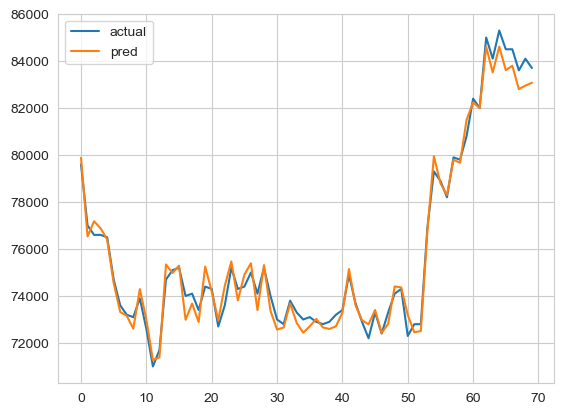

In [288]:
#############################################
###### 2023년까지만 학습시키고, 2024년을 예측하도록함
#############################################

train = samsung[samsung.index.year != 2024] # 2024년이 아닌 학습용 데이터를 불러옴
test = samsung[samsung.index.year == 2024] # 2024년인 테스트 데이터를 불러옴

X, Y = [], []
for i in range(len(train)-1):
    a = train.iloc[i].to_numpy()
    b = train.iloc[i+1]['Close']

    X.append(a)
    Y.append(b)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(oob_score=True)
rf.fit(X,Y)

pred = []
for i in range(len(test)):
    a = test.iloc[i].to_numpy()
    b = rf.predict([a])[0]
    pred.append(b)

plt.plot(range(len(test)), test['Close']) #맞춰야 하는 실제 2024년 종가
plt.plot(range(len(test)), pred) # 모델이 예측한 2024년 종가
plt.legend(['actual','pred'])

In [298]:
###############################
## 30일치 단위로 모아서 데이터를 표현
##############################

X, Y = [], []
window = 30 # 30일치 데이터를 넣음

for i in range(len(samsung) - window):
    a = samsung.iloc[i : i+window].to_numpy().reshape(180) 
        # reshape으로 (5969, 30, 6) 3차원을 (5969, 180) 2차원으로 변환
    X.append(a)
    
    b = samsung.iloc[i+window]['Close']
    Y.append(b)

rf = RandomForestRegressor(oob_score=True)
rf.fit(X,Y)
print("rf.oob_score_ :", rf.oob_score_)

0.9992578170397238

In [302]:
samsung.iloc[-window:].to_numpy().reshape(180) # 최근 30일 치 데이터를 호출
rf.predict([a]) # 종가 예측

array([83726.])

In [311]:
### 팀미션(한국관광데이터 전 데이터 불러와서 합치기) : 중국인 관광객 변화 추이
import pandas as pd
import koreanize_matplotlib
import seaborn as sns

df=pd.DataFrame()

for year in range(2010, 2021):
    for month in range(1, 13):
        if(year==2020 and month==6): break
        dirname = "한국관광데이터/"
        filename = "kto_" + str(year) + str(month).zfill(2) + ".xlsx"
        df_tmp = pd.read_excel(dirname + filename,
                              header=1,
                              usecols="A:G",
                              skipfooter=4)
        df_tmp["year"]=year
        df_tmp["month"]=month
        df_tmp["year_month"]=str(year) + str(month).zfill(2)
        #df_tmp[""] = df_tmp.groupby("year_month")["관광"].sum()

        if(month==1 or month==2 or month==3): df_tmp["quarter"] = "1Q"
        elif(month==4 or month==5 or month==6): df_tmp["quarter"] = "2Q"
        elif(month==7 or month==8 or month==9): df_tmp["quarter"] = "3Q"
        elif(month==10 or month==11 or month==12): df_tmp["quarter"] = "4Q"

        if(month==12 or month==1 or month==2): df_tmp["weather"] = "winter"
        elif(month==4 or month==5 or month==3): df_tmp["weather"] = "spring"
        elif(month==7 or month==8 or month==6): df_tmp["weather"] = "summer"
        elif(month==10 or month==11 or month==9): df_tmp["weather"] = "fall"

        df = pd.concat([df, df_tmp], ignore_index=True)

df
china=df[df["국적"]=="중국"]

,국적,관광,상용,공용,유학/연수,기타,계,year,month,year_month,quarter,weather
0,아시아주,329131,18238,421,4339,80916,433045,2010,1,201001,1Q,winter
1,일본,202825,1750,89,549,3971,209184,2010,1,201001,1Q,winter
2,대만,35788,41,17,37,516,36399,2010,1,201001,1Q,winter
3,홍콩,13874,55,0,21,595,14545,2010,1,201001,1Q,winter
4,마카오,554,0,0,0,0,554,2010,1,201001,1Q,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
8370,아프리카 기타,3,1,3,6,118,131,2020,5,202005,2Q,spring
8371,기타대륙,1,0,0,0,3,4,2020,5,202005,2Q,spring
8372,국적미상,1,0,0,0,3,4,2020,5,202005,2Q,spring
8373,교포소계,0,0,0,0,790,790,2020,5,202005,2Q,spring


<Axes: xlabel='month', ylabel='year'>

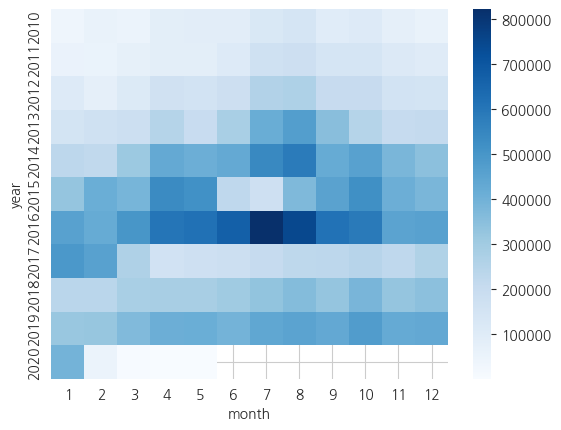

In [315]:
result = china.pivot_table(index="year", columns="month", values="관광")
sns.heatmap(result, cmap="Blues")
# 1. 2015.6~8월 : 메르스 이슈
# 2. 2017년 : 사드(쏘이슈
# 3. 2020년 : 코로나 이슈